In [201]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import spdiags, kron, eye, vstack, identity
from scipy.sparse.linalg import spsolve


In [202]:
img = pd.read_csv('noisy_image.csv', header=None)
img = img.to_numpy()

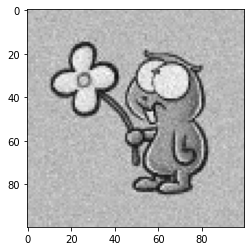

In [203]:
# plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

In [204]:
# Assuming f_noisy is a 2D NumPy array
nx1, nx2 = img.shape
nx = nx1 * nx2
h1 = 1 / (nx1 - 1)
h2 = 1 / (nx2 - 1)
e = np.ones(nx)

# Horizontal difference operator D1
D1 = (1 / h1) * spdiags([-e, e], [0, nx1], nx1 * (nx2 - 1), nx)

# Vertical difference operator D2
D2row = spdiags([-np.ones(nx1), np.ones(nx1)], [0, 1], nx1 - 1, nx1)
D2 = (1 / h2) * kron(eye(nx2), D2row)

# Combined difference operator D
D = vstack([D1, D2])

In [205]:
D.shape

(19800, 10000)

In [206]:
omega = 1e-4

xi = spsolve(eye(nx) + omega * D.T @ D, img.flatten())
xi

array([194.78037972, 197.90931031, 195.06223069, ..., 200.2170484 ,
       201.52811959, 198.41353339])

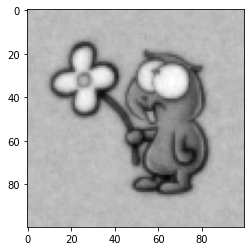

In [207]:
# plt.figure(figsize=(10, 10))
plt.imshow(xi.reshape(nx1, nx2), cmap='gray')

In [208]:
x = img.flatten()
y = D @ x
z = np.ones(D.shape[0])
lamb = 1e-4
omega = 0.09
D.shape[0]

19800

In [209]:
def S(t, n):
    # print(t.shape, np.abs(t).shape, np.maximum(np.abs(t) - n, 0).shape)
    return (t / np.abs(t)) * np.maximum(np.abs(t) - n, 0)

In [210]:
x_old = x.copy()
y_old = y.copy()
z_old = z.copy()

count = 0
while True:
    count += 1
    x_new = spsolve(identity(nx) +  lamb * D.T @ D, img.flatten() + lamb * D.T @ (y_old - z_old))
    if np.linalg.norm(x_new - x_old) / np.linalg.norm(x_new) < 1e-4:
        break
    y_new = S(D @ x_new + z_old, omega/lamb)
    z_new = z_old + D @ x_new - y_new

    x_old = x_new
    y_old = y_new
    z_old = z_new

count_oldtol, x_new_oldtol = count, x_new

In [211]:
x_old = x.copy()
y_old = y.copy()
z_old = z.copy()

count = 0
while True:
    count += 1
    x_new = spsolve(identity(nx) +  lamb * D.T @ D, img.flatten() + lamb * D.T @ (y_old - z_old))
    if np.linalg.norm(x_new - x_old) / np.linalg.norm(x_new) < 1e-6:
        break
    y_new = S(D @ x_new + z_old, omega/lamb)
    z_new = z_old + D @ x_new - y_new

    x_old = x_new
    y_old = y_new
    z_old = z_new

count_newtol, x_new_newtol = count, x_new

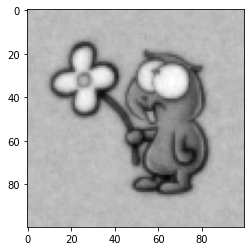

In [216]:
# plt.figure(figsize=(10, 10))
plt.imshow(xi.reshape(nx1, nx2), cmap='gray')
